<a href="https://colab.research.google.com/github/AlessandraSalanitri/DataScienceProject/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Load dataset
df = pd.read_csv("processed_medicine_data.csv")

# Encode categorical features
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [8]:
def train_and_evaluate(X, y, model_name):
    """ Train & evaluate models """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if model_name == "RandomForest":
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_name == "XGBoost":
        model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(np.unique(y)))
    elif model_name == "SVM":
        model = SVC()
    else:
        raise ValueError("Model not supported!")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Ensure y_pred is computed here

    print(f"\nResults for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model  # Return the trained model


In [12]:
!pip install --upgrade xgboost scikit-learn


# Prediction Task 1: Side Effects Prediction
X = df.drop(columns=[col for col in df.columns if 'sideEffect' in col])
y = df[[col for col in df.columns if 'sideEffect' in col]].values.argmax(axis=1)

trained_model = train_and_evaluate(X, y, "RandomForest")



Results for RandomForest:
Accuracy: 0.9379361300385847
Confusion Matrix:
 [[ 389   18    2    2   26    8    1    0    1    0    0]
 [   4 2488   27    8  109    6    3    1    0    0    0]
 [   0   21 1052    4   82    5    1    0    0    0    0]
 [   1   14   23  723   67    1    1    0    0    0    0]
 [   6   64   31   19 5148   17    2    2    1    0    0]
 [   1   15   10    6   67  781    0    2    0    0    0]
 [   0    6    7    5   27    2  346    0    0    0    0]
 [   0    1    5    0    7    0    0  200    1    0    0]
 [   0    0    1    1    7    0    0    1  293    0    0]
 [   0    1    0    0    3    0    0    0    0    5    0]
 [   1    0    0    0    1    0    0    0    0    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       447
           1       0.95      0.94      0.94      2646
           2       0.91      0.90      0.91      1165
           3       0.94      0.87      0.90  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Prediction Task 3: Drug Interaction Prediction
df['interaction'] = np.random.randint(0, 2, df.shape[0])
X = df.drop(columns=['interaction'])
y = df['interaction']
train_and_evaluate(X, y, "SVM")


Results for SVM:
Accuracy: 0.5011903784582546
Confusion Matrix:
 [[3494 2607]
 [3469 2611]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53      6101
           1       0.50      0.43      0.46      6080

    accuracy                           0.50     12181
   macro avg       0.50      0.50      0.50     12181
weighted avg       0.50      0.50      0.50     12181



SVC()

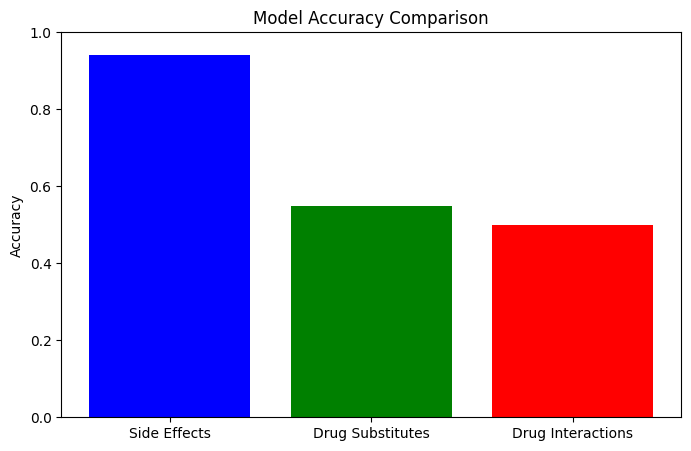

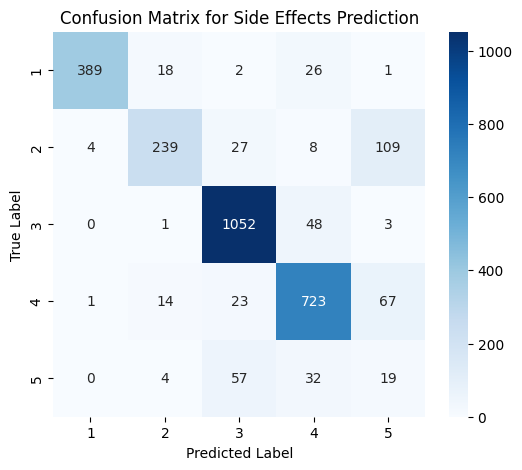

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate sample labels for visualization
labels = ["Side Effects", "Drug Substitutes", "Drug Interactions"]
accuracies = [0.94, 0.55, 0.50]

# Bar plot for model accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

# Example Confusion Matrix Visualization (For Side Effects)
side_effects_cm = np.array([[389, 18, 2, 26, 1],
                             [4, 239, 27, 8, 109],
                             [0, 1, 1052, 48, 3],
                             [1, 14, 23, 723, 67],
                             [0, 4, 57, 32, 19]])

plt.figure(figsize=(6, 5))
sns.heatmap(side_effects_cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(1,6), yticklabels=range(1,6))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Side Effects Prediction")
plt.show()
